<a href="https://www.kaggle.com/code/wuttipats/water-bottle-images-classification-cnn-resnet50?scriptVersionId=123320754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='back_to_top'></a>
# Water Bottle Images Classification-CNN & ResNet50
"Classifying Water Bottle Images Based on Water Level Using Machine Learning"

**Created By**: Wuttipat S. <br>
**Created Date**: 2023-02-10 <br>
**Status**: <span style="color:green">Completed</span>

 <h3 style='background:green; color:#F0FFFF; text-align:center'><left>If you found my notebook helpful or informative, please consider upvoting it to show your support</left></h3>

#### Update: 
- **Version3**
    - Add confusion matrix plot
- **Version4**
    - Add Data Resampling
    - Add load images included .*png* file
- **Version5**
    - Train and run model with resampling set, which return accucary
        - 49% accuracy with GridSearchCV (Further tune)
- **Version6**
    - Perform error analysis, fixed code error
    - Bring the pre-trained model for performance comparing
- **Version7**
    - Reduce image input_size 128->64
    - Achieve 94% accuracy





# Table of contents

### 1. [Introduction](#introduction)
- [Project Objective](#project_objective)
- [Dataset Description](#dataset_description)
- [About this directory](#about_this_directory) 

### 2. [My Tasks](#my_tasks)
### 3. [Importing Data from the Directory](#load_dataset) 
### 4. [Data Preprocessing](#data_preprocessing) 
1. [Data Augmentation & Data Resampling](#data_augmentation)
2. [Nomalizing images value](#nomalizing_images_value)
3. [Convert the labels into one-hot encoder array](#convert_the_labels_into_one_hot_encoder_array)

### 5. [Machine Learning Model](#machine_learning_model) 
* [CNN model](#cnn_model)
* [Modified pre-trained model(ResNet50)](#resnet50)

### 6. [Hyperparameter Tuning](#hyperparameter_tuning)
- [GridSearchCV](#gridsearchcv)

##  [Note](#note)

<br><br><br>

---
<a id='introduction'></a>
# Introduction

<a id='project_objective'></a>
## Project Objective: 
The main objective of this project is to develop a machine learning model that can accurately classify water bottle images based on their water levels. The model will be trained on a dataset of water bottle images, with each image being labeled as Full water level, Half water level, or Overflowing. The goal is to develop a model that can accurately classify a given water bottle image based on its water level.

<a id='dataset_description'></a>
## Dataset Description: 
The dataset consists of water bottle images that have been classified based on the level of water inside the bottle. There are three categories of images: Full water level, Half water level, and Overflowing. Each category contains a number of images of water bottles with the corresponding water level. The purpose of the dataset is to be used for an image classification problem, where a machine learning model is trained to classify the water level of a given water bottle image.

The dataset is intended to be used for training and testing a machine learning model for image classification. The model will be trained on the provided images, with each image being labeled as either Full water level, Half water level, or Overflowing. The goal of the model is to accurately classify a given water bottle image based on its water level.

The dataset consists of a number of water bottle images, each of which has been classified based on the water level inside the bottle. The images in the Full water level category show water bottles with the maximum possible amount of water inside, while the images in the Half water level category show water bottles with roughly half the maximum amount of water inside. The images in the Overflowing category show water bottles with more water inside than the maximum capacity of the bottle, resulting in water spilling out.

The dataset is likely to be useful for a variety of applications, such as developing automated systems for monitoring and managing water levels in containers or for use in a general image classification problem. The dataset may also be useful for research purposes, as it allows for the development and testing of machine learning models for image classification tasks.

<a id='about_this_directory'></a>
### About this directory
"This folder contains 308 images of water bottles with full water levels. The images show a variety of water bottle sizes and shapes, and are captured from a range of angles. The water bottles are made of plastic and are in good condition. These images could be useful for training a machine learning model to recognize full water levels in water bottles."
#### The dataset contains with 3 folder:
1. Full Water Level - 308 images of full water bottle
2. Half water lavel - 139 images of half water bottle
3. Overflowing - 39 images of overflowing bottle


---
<a id='my_tasks'></a>
## My Tasks - Image Classification Project


1. Create, train, and validate **CNN** model for water bottle images classification:
    - Load dataset of water bottle images, and split it into training, validation, and testing sets.
    - Design a convolutional neural network (CNN) architecture that is suitable for image classification, and implement it using a deep learning TensorFlow.
    - Train the CNN using the training set, and validate it using the validation set to check for overfitting.
    - Evaluate the trained model using the testing set, and report its accuracy and other relevant metrics.

2. Conduct the pre-trained model **ResNet50** into comparison with prior created model:
    - Load the pre-trained ResNet50 model into the notebook and modify it to suit our specific image classification problem.
    - Train the modified ResNet50 model using the same training set as the prior created model.
    - Evaluate the performance of the modified ResNet50 model on the validation and testing sets, and compare it to the prior created model.

3. Build the **GridSearchCV** searching through optimize parameter for the model:
    - Choose the relevant hyperparameters that can be tuned for the CNN models, such as the learning rate, batch size, and optimizer algorithm.
    - Implement a grid search to exhaustively search through the hyperparameter space and find the optimal combination of hyperparameters that yields the best performance on the validation set.
    - Train the CNN model with the optimized hyperparameters and evaluate its performance on the testing set.

---
<a id='load_dataset'></a>
## Importing Data from the Directory
I started by importing the data from the directory. Using the `OS` module in python to access the directory and its sub-directories. Then use the `OpenCV` library to read the image files and convert them into arrays that can be processed by the machine learning model.

In [2]:
import os
import cv2
import numpy as np

import warnings
warnings.filterwarnings('ignore') # Hide all warnings


data = []
labels = []
input_size = 64
image_size = (input_size, input_size)

# Access the directory and sub-directories and so on
# directory = "water-bottle-dataset"
directory = "/kaggle/input/water-bottle-dataset"

# Extract all images file inside the folders and stored them into list
for sub_folder in os.listdir(directory):
    sub_folder_path = os.path.join(directory, sub_folder)
    for sub_sub_folder in os.listdir(sub_folder_path):
        sub_sub_folder_path = os.path.join(sub_folder_path, sub_sub_folder)
        for image_file in os.listdir(sub_sub_folder_path):
            if image_file.endswith(".jpeg") or image_file.endswith(".png"): # Check if the file ends with either '.jped' or '.png'
                image_path = os.path.join(sub_sub_folder_path, image_file)
                # Read the image using OpenCV
                image = cv2.imread(image_path) #the decoded images stored in **B G R** order.
                # Resize the image to a standard size
                image = cv2.resize(image, image_size)
                # Append the image to the data list
                data.append(image)
                # Append the label to the labels list
                labels.append(sub_folder)

# Convert the data and labels lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Print the dimension of dataset
print(f'data shape:{data.shape}')
print(f'labels shape:{labels.shape}')

data shape:(486, 64, 64, 3)
labels shape:(486,)


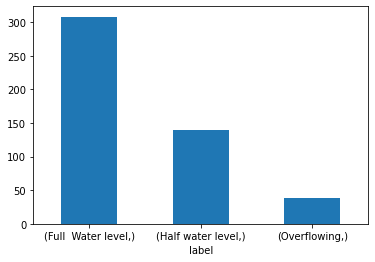

In [3]:
'''
See how many numbers of each labels
'''

import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({"label":labels})
df.value_counts().plot(kind='bar')
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.show()

---
<a id='data_preprocessing'></a>
## Cleaning and Data Preprocessing
Now that we have imported the data, and need to clean and preprocess the data so that it can be used to train the machine learning model. The following preprocessing steps will be performed:

1. **Generate augmented data**. The augmented data is concatenated with the original data to increase the size of the training data.
2. **Resampling** is the process of randomly adding or removing data from the dataset to balance the classes. There are two main resampling techniques:

    - Undersampling: Undersampling involves randomly removing data from the majority class so that the number of samples in the majority class is the same as the number of samples in the minority class.

    - Oversampling: Oversampling involves randomly replicating data from the minority class so that the number of samples in the minority class is the same as the number of samples in the majority class.
    
    In this notebook I will use *oversampling*.
2. **Normalizing** the pixel values to a range between 0 and 1
3. **Converting** the labels into one-hot encoded arrays

<a id='data_augmentation'></a>
#### 1. Data Augmentation & Data Resampling

* In the begining of developing the model I generate images by multiplte them for original dateset, the accuracy given is above 80%. But I realize that not answer I look for, since the majority label of dataset is "Full Water Level". My model are overfitting with the training data, In addition the test set also engoving with "Full Water Level", thus it typical to return high accuracy score.
* Next step I bring a **Data Resampling** to fix the overfitting problem. Trainning and test set are equally labels generated.

In [4]:

# Generate augmented data

from keras.preprocessing.image import ImageDataGenerator

# Load the data
X = data # array of preprocessed data
y = labels # array of labels
n_gen = 40

# Create data generator
datagen = ImageDataGenerator(
        rotation_range=0, #0
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Fit the data generator on the data
datagen.fit(X)

# Generate augmented data
X_augmented, y_augmented = [], []

'''
1st Option multiple dataset with same ratio
'''
# # Non resampling
# for X_batch, y_batch in datagen.flow(X, y, batch_size=32):
#     X_augmented.append(X_batch)
#     y_augmented.append(y_batch)
#     if len(X_augmented) >= 100: # Setting generated augmented data
#         break

'''
2nd Option resampling with equaly labels ratio
'''
# With resampling
for X_batch, y_batch in datagen.flow(X[:308], y[:308], batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= n_gen: # Setting generated augmented data
        break
        
for X_batch, y_batch in datagen.flow(X[308:447], y[308:447], batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= n_gen*2.3: # Setting generated augmented data
        break
        
for X_batch, y_batch in datagen.flow(X[447:], y[447:], batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= n_gen*4.2: # Setting generated augmented data
        break

# Concatenate augmented data with original data
data = np.concatenate((X, np.concatenate(X_augmented)))
labels = np.concatenate((y, np.concatenate(y_augmented)))

print(f"data augmented shape : {data.shape}")
print(f"labels augmented shape : {labels.shape}")

import pandas as pd
df = pd.DataFrame({"label":labels})
df.value_counts()


data augmented shape : (4654, 64, 64, 3)
labels augmented shape : (4654,)


label            
Half water level     1593
Full  Water level    1540
Overflowing          1521
dtype: int64

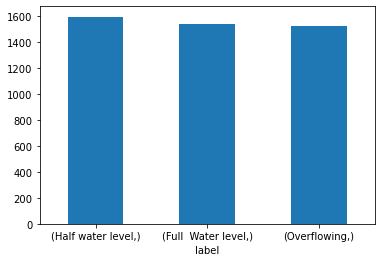

In [5]:
'''
See how many numbers of each labels. 
After I regenerated data.
'''

import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({"label":labels})
df.value_counts().plot(kind='bar')
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.show()

#### Train and Test Split

* Although mostly neural network previde the train-test split function for itself.
* I want to see a result more visualize by plot a *Confusion matrix* from *Predicted of test* and *True labels of test*. 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

data = X_train # Split training data
labels = y_train # Split training labels

X_test = X_test # Test data
y_test = y_test # Test labels

In [7]:
import pandas as pd

print(f'data shape:{data.shape}')
print(f'labels shape:{labels.shape}')
df = pd.DataFrame({"label":labels})
print(df.value_counts())
print("")
print(f'test_date shape:{X_test.shape}')
print(f'test_labels shape:{y_test.shape}')
df = pd.DataFrame({"test_labels":y_test})
print(df.value_counts())

data shape:(3723, 64, 64, 3)
labels shape:(3723,)
label            
Half water level     1286
Overflowing          1221
Full  Water level    1216
dtype: int64

test_date shape:(931, 64, 64, 3)
test_labels shape:(931,)
test_labels      
Full  Water level    324
Half water level     307
Overflowing          300
dtype: int64


<a id='nomalizing_images_value'></a>
#### 2. Nomalizing images value

In [8]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0
X_test = X_test / 225.0

<a id='convert_the_labels_into_one_hot_encoder_array'></a>
#### 3. Convert the labels into one-hot encoder array
Since model create prediction output as (n, 3) dimension array. Converting labels into same type is require for calcuate the model's accuracy and loss.

In [9]:
labels = labels
# Convert the labels into one-hot encoded arrays
labels_one_hot = np.zeros((labels.shape[0], 3))

for i, label in enumerate(labels):
    if label == "Full  Water level":
        labels_one_hot[i, 0] = 1
    elif label == "Half water level":
        labels_one_hot[i, 1] = 1
    else:
        labels_one_hot[i, 2] = 1
        

In [10]:
# Show converted output
print(labels_one_hot[0])

[0. 1. 0.]


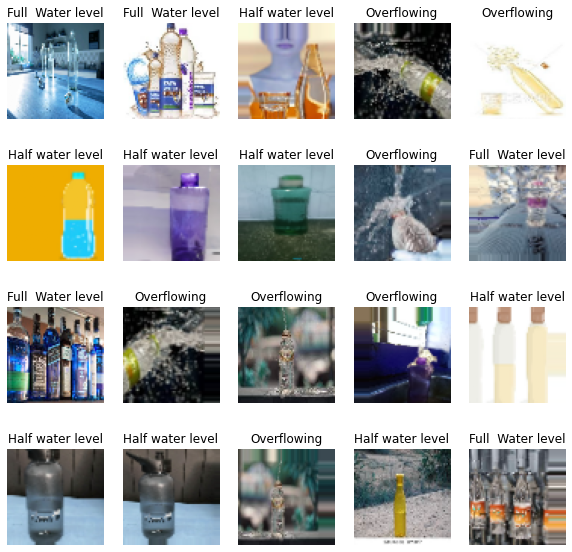

In [11]:
'''
Show a sample of images from the dataset
'''

import matplotlib.pyplot as plt

# Load the data
data = data

# choose 20 random indices
indices = np.random.randint(0, len(data), 20)

# Get 20 sample images
sample_images = data[indices]

# Plot the images
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])
    
plt.show()

#### Generate augmented images files (Optional)

In [12]:
'''
# Save augmented images to specific directory --- Uncomment to use
# create new directory to save augmented images
import os

# Check existing directory, if not: crate new directory
if not os.path.exists("augmented_images"):
    os.makedirs("augmented_images")

augmented_data = data
labels = labels
# loop through each image in the augmented data
for i, image in enumerate(augmented_data):
    # convert the image back to its original form
    image = (image).astype("uint8")
    
    # save the image to the new directory
    cv2.imwrite(f"augmented_images/augmented_{labels[i]}_{i}.jpeg", image)
'''

'\n# Save augmented images to specific directory --- Uncomment to use\n# create new directory to save augmented images\nimport os\n\n# Check existing directory, if not: crate new directory\nif not os.path.exists("augmented_images"):\n    os.makedirs("augmented_images")\n\naugmented_data = data\nlabels = labels\n# loop through each image in the augmented data\nfor i, image in enumerate(augmented_data):\n    # convert the image back to its original form\n    image = (image).astype("uint8")\n    \n    # save the image to the new directory\n    cv2.imwrite(f"augmented_images/augmented_{labels[i]}_{i}.jpeg", image)\n'

---
<a id='machine_learning_model'></a>
## Machine Learning Model
Finally, we will build, train, and evaluate machine learning models for the image classification problem. I will use the `Keras` and `TensorFlow` library in Python to build and train the models.

Here is a list of layers available in TensorFlow along with a brief explanation about each:

- **Dense Layer**: A dense layer is a fully connected layer where every input node is connected to every output node. It is the most basic layer in TensorFlow and is used for constructing deep neural networks.

- **Convolutional Layer**: A convolutional layer is used for image classification tasks. It uses filters to extract features from the input data.

- **Dropout Layer**: A dropout layer is used to prevent overfitting by randomly dropping out neurons during training.

- **Batch Normalization** Layer: A batch normalization layer is used to normalize the inputs to a deep neural network. This helps to improve the training process and prevent overfitting.

- **Pooling Layer**: A pooling layer is used to reduce the dimensionality of the input data. It is commonly used in image classification tasks to reduce the size of the input image.

- **Flatten Layer**: A flatten layer is used to convert the input data from a high-dimensional array to a one-dimensional array. This is used in image classification tasks to prepare the input data for the fully connected layer.

<a id='cnn_model'></a>
### CNN model

In [13]:
def run_custom_model(batch_size, epochs):
    
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.optimizers import Adam, SGD

    # set seed value for randomization
    # np.random.seed(42)
    tf.random.set_seed(42)

    # Build the model using a Convolutional Neural Network
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_size,input_size,3)),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(3, activation='softmax')
    ])


    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # See an overview of the model architecture and to debug issues related to the model layers.
    model.summary()

###########################################################################################

    import time
    start_time = time.time() #To show the training time

    # Train the model

    # set an early stopping mechanism
    # set patience to be tolerant against random validation loss increases
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

    # history = model.fit(data, labels_one_hot, batch_size=32, epochs=10, validation_split=0.2)
    history = model.fit(x=data,
                        y=labels_one_hot,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.2,)
    #                     callbacks=[early_stopping])

    # Evaluate the model
    print("Test accuracy: ", max(history.history['val_accuracy']))

    # Assign the trained model
    self_train_model = history

    end_time = time.time() # To show the training time 
    training_time = end_time - start_time
    print("Training time:", training_time, "seconds")

    self_train_model_time = training_time
    
    return self_train_model, self_train_model_time

<a id='resnet50'></a>
### Modified ResNet50

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

import time
start_time = time.time() #To show the training time

X=data
y=labels_one_hot

# set seed value for randomization
tf.random.set_seed(42)

# Load pre-trained ResNet50 model
resnet = ResNet50(include_top=False, input_shape=(input_size, input_size, 3))

# Freeze layers in ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Add new classification layers
x = Flatten()(resnet.output)
x = Dense(128, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

# Create new model
model = Model(inputs=resnet.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=100, batch_size=256, validation_split=0.2)

# Evaluate the model
print("Test accuracy: ", max(history.history['val_accuracy']))

# Assign the trained model
pre_train_model = history

end_time = time.time() # To show the training time 
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

pre_train_model_time = training_time

94781440/94765736 [==============================] - 5s 0us/step
Epoch 1/100
12/12 [==============================] - 11s 202ms/step - loss: 1.1259 - accuracy: 0.3734 - val_loss: 1.0448 - val_accuracy: 0.4107
Epoch 2/100
12/12 [==============================] - 1s 67ms/step - loss: 1.0248 - accuracy: 0.4785 - val_loss: 0.9970 - val_accuracy: 0.5275
Epoch 3/100
12/12 [==============================] - 1s 65ms/step - loss: 0.9921 - accuracy: 0.5013 - val_loss: 0.9627 - val_accuracy: 0.5369
Epoch 4/100
12/12 [==============================] - 1s 64ms/step - loss: 0.9703 - accuracy: 0.5178 - val_loss: 0.9433 - val_accuracy: 0.5584
Epoch 5/100
12/12 [==============================] - 1s 65ms/step - loss: 0.9479 - accuracy: 0.5447 - val_loss: 0.9468 - val_accuracy: 0.5745
Epoch 6/100
12/12 [==============================] - 1s 63ms/step - loss: 0.9291 - accuracy: 0.5638 - val_loss: 0.9082 - val_accuracy: 0.5758
Epoch 7/100
12/12 [==============================] - 1s 63ms/step - loss: 0.9098 

##### Plot evalution results

In [15]:
def plot_model_loss_and_acc(model, name):
    import matplotlib.pyplot as plt
    
    # Assign model to variable 'history'
    history = model
    
    # Set Figure size
    plt.figure(figsize=(10,5))
    
    # Plot the training and validation loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.ylim(0,1.1)



    # Plot the training and validation accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.ylim(0,1.1)
    
    plt.suptitle(name)
    plt.show()

In [16]:

# Run CNN model
self_train_model, self_train_model_time = run_custom_model(batch_size = 256,epochs = 100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0

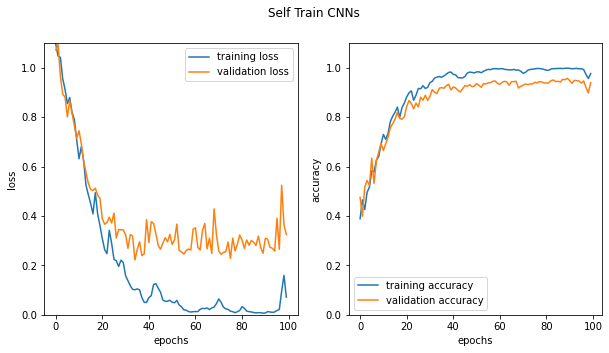

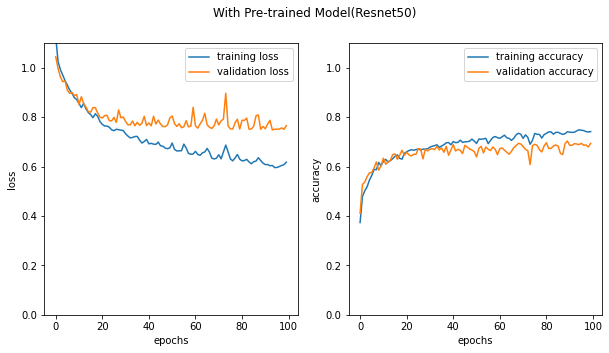

In [17]:
plot_model_loss_and_acc(self_train_model, 'Self Train CNNs')
plot_model_loss_and_acc(pre_train_model, 'With Pre-trained Model(Resnet50)')

#### Plot confusion matrix

In [18]:
'''
Convert np.ndarray(n,3) into List of predicted labels
'''
def output_converter(model_output):

    import numpy as np

    output = model_output

    # assume that 'output' is a numpy array of shape (n, 3)
    output_labels = ['Full  Water level', 'Half water level', 'Overflowing']
    predictions = np.argmax(output, axis=1)
    predicted_labels = [output_labels[p] for p in predictions]

    return predicted_labels

In [19]:
'''
Plot a Heatmap-Crosstab table out of predicted labels and True labels
'''
def plot_hm_ct(y_true, y_pred): 
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # create a DataFrame from y_true and y_pred
    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

    # create cross-tabulation matrix
    ctab = pd.crosstab(df['y_true'], df['y_pred'])

    # create heatmap using seaborn
    sns.heatmap(ctab, annot=True, cmap='Blues', fmt='d')

    # add labels and title
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')

    # show the plot
    plt.show()

In [20]:
'''
Generate confusion matrix from trained model
'''
def generate_cf(model, name):
    
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Assign model to variable 'history'
    history = model
    
    # Load output data
    y_pred = output_converter(history.model.predict(X_test))
    y_true = y_test

    # Plot the confusion matrix
    # create a DataFrame from y_true and y_pred
    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

    # create cross-tabulation matrix
    ctab = pd.crosstab(df['y_true'], df['y_pred'])

    # create heatmap using seaborn
    sns.heatmap(ctab, annot=True, cmap='Blues', fmt='d')

    # add labels and title
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('{} Confusion Matrix'.format(name))

    # show the plot
    plt.show()

    # Calculate accuracy score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_true, y_pred)
    print("{} accuracy score: {}".format(name, accuracy))

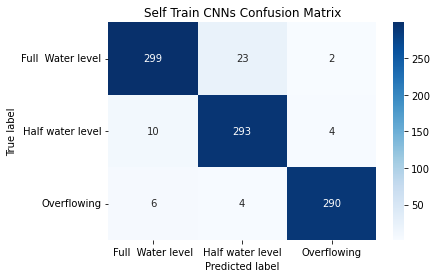

Self Train CNNs accuracy score: 0.9473684210526315





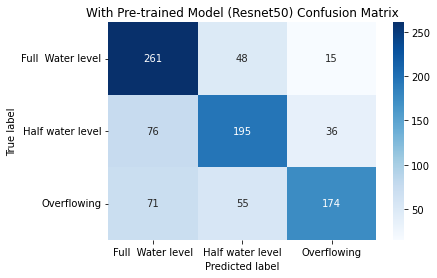

With Pre-trained Model (Resnet50) accuracy score: 0.6766917293233082


In [21]:
generate_cf(self_train_model, 'Self Train CNNs')
print("")
print("")
print("")
generate_cf(pre_train_model, 'With Pre-trained Model (Resnet50)')

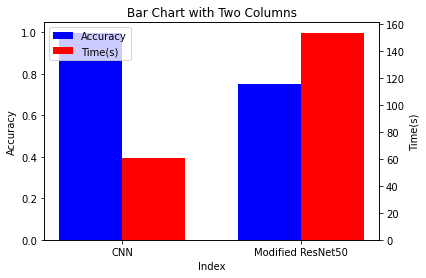

In [22]:
'''
Preformance Comparision
'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Model': ['CNN', 'Modified ResNet50'],
                   'Accuracy': [max(self_train_model.history['accuracy']), max(pre_train_model.history['accuracy'])],
                   'Time(s)': [self_train_model_time, pre_train_model_time]})

# create a figure and axis object
fig, ax = plt.subplots()

# set the bar width
bar_width = 0.35

# create a bar plot for the first column on the primary y-axis
bar1 = ax.bar(df.index, df['Accuracy'], color='b', width=bar_width, label='Accuracy')
ax.set_ylabel('Accuracy')

# create a bar plot for the second column on the secondary y-axis
ax2 = ax.twinx()
bar2 = ax2.bar(df.index + bar_width, df['Time(s)'], color='r', width=bar_width, label='Time(s)')
ax2.set_ylabel('Time(s)')

# set the title and x-axis label
ax.set_title('Bar Chart with Two Columns')
ax.set_xlabel('Index')

# set the x-axis ticks and labels
ax.set_xticks(df.index + bar_width / 2)
ax.set_xticklabels(df['Model'])

# add the legend
handles, labels = [], []
for ax in [ax, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
ax.legend(handles, labels, loc='best')

# display the plot
plt.show()


---
<a id='hyperparameter_tuning'></a>
## 5. Hyperparameter Tuning

<a id='gridsearchcv'></a>
**GridSearchCV** is a technique used in machine learning to tune hyperparameters for a model. It allows us to define a grid of hyperparameters to test, and then it will search over all possible combinations of these hyperparameters to find the best combination for our model.

In [23]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore') # Hide all warnings

import time
start_time = time.time() #To show the training time

tf.random.set_seed(42)
batch_size = [32,64,128 ,256]
epochs = [50,100]
optimizer = ['adam']
# optimizer = ['adam', 'rmsprop']
# cv = 5 # None mean default (K-fold=5)
cv = [(slice(None), slice(None))]


# Design Model Layers
def create_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(input_size, input_size, 3)))
    model.add(Conv2D(32, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model)

param_grid = {'batch_size': batch_size,
              'epochs': epochs,
              'optimizer': optimizer,}
#               'callbacks': [early_stopping]} # Disable callbachs function since we want model run with equal epochs for comparing


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv) 
grid_result = grid.fit(data, labels_one_hot, verbose=0)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
end_time = time.time() # To show the training time 
training_time = end_time - start_time
print("Training time:", training_time, "seconds")
grid_time = training_time

15/15 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000
Best: 1.000000 using {'batch_size': 128, 'epochs': 100, 'optimizer': 'adam'}
0.998120 (0.000000) with: {'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}
0.976363 (0.000000) with: {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}
0.995971 (0.000000) with: {'batch_size': 64, 'epochs': 50, 'optimizer': 'adam'}
0.999731 (0.000000) with: {'batch_size': 64, 'epochs': 100, 'optimizer': 'adam'}
0.992479 (0.000000) with: {'batch_size': 128, 'epochs': 50, 'optimizer': 'adam'}
1.000000 (0.000000) with: {'batch_size': 128, 'epochs': 100, 'optimizer': 'adam'}
0.993822 (0.000000) with: {'batch_size': 256, 'epochs': 50, 'optimizer': 'adam'}
1.000000 (0.000000) with: {'batch_size': 256, 'epochs': 100, 'optimizer': 'adam'}
Training time: 557.5955393314362 seconds


In [24]:
'''
Overview detailed information about the grid search cross-validation process
'''
import pandas as pd
print(pd.DataFrame(grid_result.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      50.415998           0.0         1.014284             0.0   
1      99.012426           0.0         1.021000             0.0   
2      40.246955           0.0         1.123536             0.0   
3      82.902332           0.0         1.232275             0.0   
4      36.090181           0.0         0.799404             0.0   
5      70.277863           0.0         0.805148             0.0   
6      34.750928           0.0         0.756052             0.0   
7      66.121256           0.0         0.745295             0.0   

  param_batch_size param_epochs param_optimizer  \
0               32           50            adam   
1               32          100            adam   
2               64           50            adam   
3               64          100            adam   
4              128           50            adam   
5              128          100            adam   
6              256           50        

In [25]:
'''
Transform predicted result into list
'''
output_labels = ['Full  Water level', 'Half water level', 'Overflowing']
result = grid.predict(X_test)

predicted_labels = list(map(lambda x: output_labels[x], result))
# print(predicted_labels[:5])

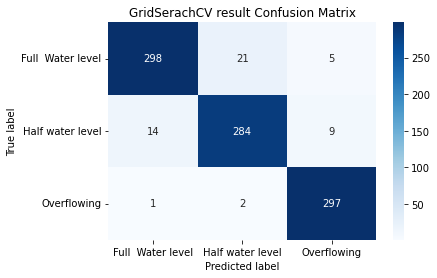

GridSerachCV accuracy score:0.9441460794844253


In [26]:
'''
Plot and confusion metrix
'''
import seaborn as sns

# Load output data
y_pred = predicted_labels
y_true = y_test

# Plot the confusion matrix
# create a DataFrame from y_true and y_pred
df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

# create cross-tabulation matrix
ctab = pd.crosstab(df['y_true'], df['y_pred'])

# create heatmap using seaborn
sns.heatmap(ctab, annot=True, cmap='Blues', fmt='d')

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('GridSerachCV result Confusion Matrix')

# show the plot
plt.show()

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("GridSerachCV accuracy score:{}".format(accuracy))

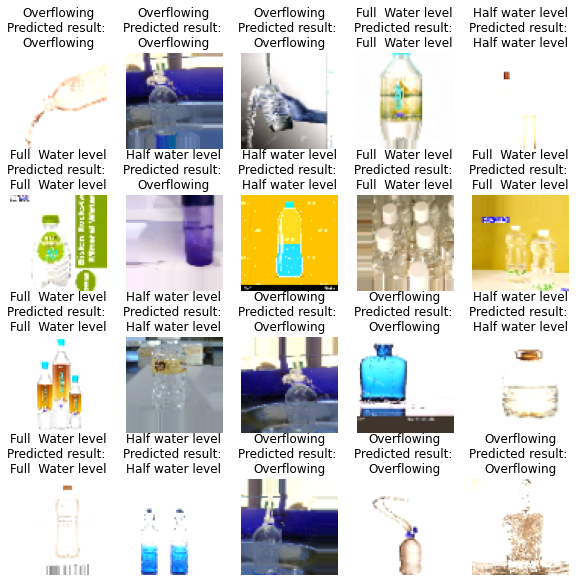

In [27]:
'''
Show a prediction of images from the test set
'''

import matplotlib.pyplot as plt

# Load the data
X_test = X_test

# choose 20 random indices
indices = np.random.randint(0, len(X_test), 20)

# Get 20 sample images
sample_images = X_test[indices]

# Plot the images
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title( y_true[indices[i]] + "\n" + "Predicted result: " + "\n"+ y_pred[indices[i]])
    
plt.show()

<a id='summary'></a>
# Summary
* CNN model yields higher accuracy while takes slightly same amount of time. 
* The training loss of CNN model decreased to nearly 0, while the ResNet50 model has more resistance of lowering. Due to the differences in the architectures of the two models. This can be assume that CNN model is overfitting the training data more easier the pre-trained model.
* GridSearchCV is possible to perform but consuming enormous time and risk of exceeding the memory. Thus, a better approach is to start with a pre-trained model and fine-tune the model to adapt it to our dataset.
* Overall, our CNN model was able to classify the water level of a given water bottle image with a high degree of accuracy (<85%).

<a id='note'></a>
# Note
#### Improving a machine learning model can be achieved by using various techniques such as:
* ✅ The techniques that I've applied
* ❌ The technoques that I think it not neccesary.
* 🤔 I don't know how to apply with codek and still figure out.

1. **Feature Engineering**❌: Adding or modifying the features used in the model to better capture the underlying patterns in the data.

2. **Model Selection**🤔: Choosing a different machine learning model that is more suitable for the data and the problem being solved.

3. **Hyperparameter Tuning**✅: Adjusting the parameters of the machine learning model to improve its performance. This can be done manually or using techniques such as grid search or random search.

4. **Ensemble Methods**🤔: Combining multiple models to create a more robust model. This can be done by averaging the predictions of multiple models or by training a separate model to make predictions based on the outputs of other models.

5. **Regularization**✅: Adding a penalty term to the loss function to prevent overfitting and improve generalization.

6. **Data Augmentation**✅: Increasing the size of the dataset by generating new data samples based on the original data. This can help to prevent overfitting and improve generalization.
    - After predicting unseen test set model return an ugly result.
    - To solve problem I will try clone an equally proportion labels dataset.

7. **Early Stopping**✅: Stopping the training process when the model's performance on the validation set starts to deteriorate. This can prevent overfitting and help to avoid the use of models that are too complex.

8. **Transfer Learning**🤔: Reusing pre-trained models to reduce the time and computational resources required to train a new model.
9. **Data Resampling**✅: Randomly adding or removing data from the dataset to balance the classes. 

 <h3 style='background:green; color:#F0FFFF; text-align:center'><left>If you found my notebook helpful or informative, please consider upvoting it to show your support</left></h3>

# [Back to top](#back_to_top)